In [54]:
import pandas as pd
import numpy as np


training = pd.read_csv("training.csv", encoding='cp1252')

test = pd.read_csv("test.csv", encoding='cp1252')


training.head()

,OBS_ID,KANAL,SHOW_ID,SHOW_DATUM,FAKTOR,WORDING_ID,BRAND_FLG,BRAND_ID,WDHL_FLG,BESTELL_ID,...,WGH3_DESC,WGH4_DESC,DIVISION_DESC_SORT,PREISKLASSE_DESC,PREIS_LABEL_DESC,FARBE,GROESSE,MENGE_FREI_SHOWBEGINN,BEWERTUNG,SOLD_OUT_FLG
0,235691,DIG,370117,30.07.2017 19:00:00,1,25802,1,12.0,1,399879,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"04 - 40 bis 49,99",NaN,SCHWARZ,NaN,7,NaN,1
1,235692,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,36,8,NaN,1
2,235693,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,38,23,NaN,1
3,235694,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,40,39,NaN,0
4,235695,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,42,44,NaN,0


In [55]:
frames = [test, training]
result = pd.concat(frames)
len(result) - len(training)



1003

In [56]:
result.drop(['DIVISION_DESC_SORT','WGH4_DESC'],axis=1,inplace=True)

In [57]:
result["FAKTOR"] = result["FAKTOR"].str.replace(',', ".").astype(float)

In [58]:
result["KANAL"] = result["KANAL"].astype('category')
result.dtypes
result["KANAL"] = result["KANAL"].cat.codes
result["KANAL"] = result["KANAL"].astype('category')

In [59]:
result['BRAND_ID'].fillna(0,inplace=True)

In [60]:
# convert PREIS_DISCOUNT into float and fill NaN with zeros
result["PREIS_DISCOUNT"] = result["PREIS_DISCOUNT"].str.replace(',', ".").astype(float)
result['PREIS_DISCOUNT'] = result['PREIS_DISCOUNT'].fillna(0)

In [61]:
result.drop(['BEWERTUNG'],axis=1,inplace=True)

In [62]:
result['MENGE_CALL'] = result['MENGE_CALL'].fillna(0)
result['MENGE_ECOM'] = result['MENGE_ECOM'].fillna(0)

In [63]:
result['TOTAL_AMOUNT']=result['MENGE_CALL']+result['MENGE_ECOM']
result['PERCENTAGE']=result['TOTAL_AMOUNT']/result['MENGE_FREI_SHOWBEGINN']


In [64]:
result["WG_DESC"] = result["WG_DESC"].astype('category')
result["WG_DESC"] = result["WG_DESC"].cat.codes
result["WG_DESC"] = result["WG_DESC"].astype('category')

In [65]:
result["WGH1_DESC"] = result["WGH1_DESC"].astype('category')
result["WGH1_DESC"] = result["WGH1_DESC"].cat.codes
result["WGH1_DESC"] = result["WGH1_DESC"].astype('category')

In [66]:
result["WGH3_DESC"] = result["WGH3_DESC"].astype('category')
result["WGH3_DESC"] = result["WGH3_DESC"].cat.codes
result["WGH3_DESC"] = result["WGH3_DESC"].astype('category')

In [67]:
result['PREISKLASSE_DESC']=result['PREISKLASSE_DESC'].str[:2]
result['PREISKLASSE_DESC']=result['PREISKLASSE_DESC'].astype('int')

In [70]:
result['PREIS_LABEL_DESC'] = result['PREIS_LABEL_DESC'].fillna(0)
result["PREIS_LABEL_DESC"]= result["PREIS_LABEL_DESC"].astype('category')
result['PREIS_LABEL_DESC'] = result['PREIS_LABEL_DESC'].cat.codes
result["PREIS_LABEL_DESC"]= result["PREIS_LABEL_DESC"].astype('category')


In [71]:
result["FARBE"] = result["FARBE"].astype('category')
result["FARBE"] = result["FARBE"].cat.codes
result["FARBE"]= result["FARBE"].astype('category')


In [72]:
result['SHOW_DATUM']=pd.to_datetime(result['SHOW_DATUM'])
result['DAY_OF_WEEK'] = result['SHOW_DATUM'].dt.day_name()
result["DAY_OF_WEEK"] = result["DAY_OF_WEEK"].astype('category')
result["DAY_OF_WEEK"] = result["DAY_OF_WEEK"].cat.codes
result["DAY_OF_WEEK"] = result["DAY_OF_WEEK"].astype('category')

def from_hour_to_time_slot(x):
    if 7 <= x < 9:
        return "MORNING TIME"
    elif 9 <= x <17:
        return "DAYTIME"
    elif 17 <= x < 20:
        return "EARLY PRIME TIME"
    elif 20 <= x < 23:
        return "PRIME TIME"
    elif 1 <= x < 7:
        return "LATE NIGHT"
    else:
        return "LATE PRIME TIME"

result['Hour_of_the_day'] = result['SHOW_DATUM'].dt.hour
result.Hour_of_the_day = result.Hour_of_the_day.map(from_hour_to_time_slot)
result.Hour_of_the_day.unique()
result["Hour_of_the_day"] = result["Hour_of_the_day"].astype('category')
result["Hour_of_the_day"] = result["Hour_of_the_day"].cat.codes
result["Hour_of_the_day"] = result["Hour_of_the_day"].astype('category')

result.drop(['SHOW_DATUM'],axis=1,inplace=True)
result.drop(['WGH4_ID'],axis=1,inplace=True)

In [73]:

# DATE and WEEKDAY
result['SHOW_DATUM']=pd.to_datetime(training['SHOW_DATUM'])
result['DAY_OF_WEEK'] = result['SHOW_DATUM'].dt.day_name()
result["DAY_OF_WEEK"].replace(['Monday'],1,inplace=True)
result["DAY_OF_WEEK"].replace(['Tuesday'],2,inplace=True)
result["DAY_OF_WEEK"].replace(['Wednesday'],3,inplace=True)
result["DAY_OF_WEEK"].replace(['Thursday'],4,inplace=True)
result["DAY_OF_WEEK"].replace(['Friday'],5,inplace=True)
result["DAY_OF_WEEK"].replace(['Saturday'],6,inplace=True)
result["DAY_OF_WEEK"].replace(['Sunday'],7,inplace=True)

In [86]:
# convert GROESSE into category variable, fill NaN with zero and merge certain data

result['GROESSE'] = result['GROESSE'].fillna(0)
result['GROESSE'].replace('ONESIZE','ONE SIZE',inplace=True)
result['GROESSE'].replace('A',0,inplace=True)
result['GROESSE'].replace('B',0,inplace=True)
result["GROESSE"] = result["GROESSE"].astype('category')
result['GROESSE'] = result['GROESSE'].cat.codes
result["GROESSE"] = result["GROESSE"].astype('category')

result["GROESSE"]


0       22
1       34
2       32
3       36
4       24
5       36
6       24
7       26
8       28
9       32
10      28
11      18
12      22
13      10
14      12
15      22
16      24
17      32
18      38
19      34
20      22
21      32
22      30
23      24
24      34
25      36
26      34
27      24
28      26
29      26
        ..
6632    28
6633    30
6634    32
6635    34
6636    36
6637    22
6638    24
6639    28
6640    30
6641    32
6642    34
6643    36
6644    38
6645    40
6646    24
6647    26
6648    28
6649    30
6650    32
6651    34
6652    38
6653    22
6654    24
6655    26
6656    28
6657    30
6658    32
6659    34
6660    38
6661    40
Name: GROESSE, Length: 7665, dtype: category
Categories (49, int64): [0, 1, 2, 3, ..., 45, 46, 47, 48]

In [87]:
result['NEW_ITEM_FLG'].fillna(0,inplace=True)
result['AIRING_23_FLG'].fillna(0,inplace=True)
result['AIRING_456_FLG'].fillna(0,inplace=True)
result['AIRING_23_FLG'].replace(1,2,inplace=True)
result['AIRING_456_FLG'].replace(1,4,inplace=True)
result['AIRING']=result['NEW_ITEM_FLG']+result['AIRING_23_FLG']+result['AIRING_456_FLG']


result["AIRING"] = result["AIRING"].astype('category')
result["AIRING"] = result["AIRING"].cat.codes
result["AIRING"] = result["AIRING"].astype('category')



result["ADT_FLG"] = result["ADT_FLG"].astype('category')
result["ADT_FLG"] = result["ADT_FLG"].cat.codes
result["ADT_FLG"] = result["ADT_FLG"].astype('category')

In [88]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7665 entries, 0 to 6661
Data columns (total 38 columns):
OBS_ID                   7665 non-null int64
KANAL                    7665 non-null category
SHOW_ID                  7665 non-null int64
FAKTOR                   7665 non-null float64
WORDING_ID               7665 non-null int64
BRAND_FLG                7665 non-null int64
BRAND_ID                 7665 non-null float64
WDHL_FLG                 7665 non-null int64
BESTELL_ID               7665 non-null int64
ARTIKEL_ID               7665 non-null int64
SHOW_POSITION            7665 non-null int64
NEW_ITEM_FLG             7665 non-null int64
AIRING_23_FLG            7665 non-null int64
AIRING_456_FLG           7665 non-null int64
ADT_FLG                  7665 non-null category
WG_ID                    7665 non-null int64
WGH1_ID                  7665 non-null int64
WGH3_ID                  7665 non-null int64
PREIS_DISCOUNT           7665 non-null float64
ANZ_ARTIKEL_ID           7

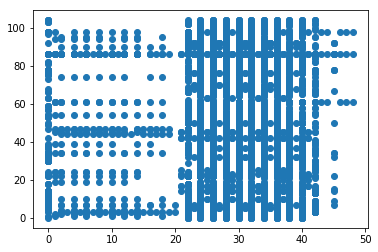

In [89]:
% matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(result["GROESSE"],result["FARBE"])
plt.show()


In [90]:
X = result[["GROESSE","FARBE"]]

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_transformed = scaler.fit_transform(X)


In [92]:
from sklearn.cluster import KMeans

scores=[]
for n in range (2,12):
    model = KMeans(n_clusters=n)
    model.fit(X_transformed)
    scores.append(model.inertia_)
    #print(model.inertia_)
    

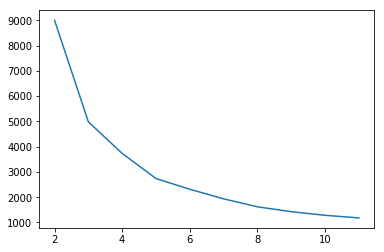

In [93]:
% matplotlib inline

import matplotlib.pyplot as plt


plt.plot(range(2,12),scores)
plt.show()

In [102]:
from sklearn.cluster import KMeans



model = KMeans(n_clusters=7)
model.fit(X_transformed)
model.fit(X_transformed)

labels=model.labels_
centers=model.cluster_centers_
centers_transformed=scaler.inverse_transform(centers)

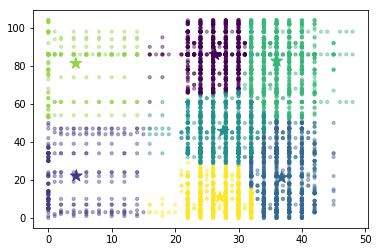

In [103]:
% matplotlib inline

import matplotlib.pyplot as plt


plt.scatter(result["GROESSE"],result["FARBE"],c=labels,alpha=0.4,s=10)
plt.scatter(centers_transformed[:,0],centers_transformed[:,1],c=range(len(centers_transformed)),marker="*",s=150)
plt.show()
